# PERMISSION BASED ANDROID MALWARE DETECTION USING MACHINE LEARNING

## Objectives

The primary objective of this research project is to develop a robust malware detection system for Android applications based on their requested permissions. Specifically, the goals include: 

Malware Detection: Develop machine learning models capable of accurately identifying malware applications from benign ones based on the permissions requested by the apps.

Feature Engineering: Explore innovative feature engineering techniques to enhance the representation of permission data, potentially improving detection accuracy.

Model Comparison: Implement and compare the performance of two machine learning models, Random Forest and Naive Bayes, in the context of malware detection.

Data Exploration: Conduct a comprehensive exploratory data analysis (EDA) to gain insights into the distribution and patterns of Android permissions and malware labels.

Data Pre-processing: Perform data pre-processing tasks, including handling missing data, normalization, and encoding permissions, to prepare the dataset for modeling.

Visualization: Create visualizations to represent data relationships and model performance effectively.

Documentation: Produce a detailed report documenting the entire research process, including methodologies, results, and conclusions.

## Scope

The project will focus on the following key areas:

Dataset: Utilize the Kaggle dataset containing Android application permissions (both benign and malware) for analysis and model development.

Feature Engineering: Investigate two feature engineering techniques to enhance the representation of permissions in the dataset.

Machine Learning Models: Implement Random Forest and Naive Bayes machine learning models for malware detection.

Performance Comparison: Compare the performance of the selected models using appropriate evaluation metrics.

## Resource Allocation

Data and Tools: Access to the Kaggle dataset, machine learning libraries (e.g., scikit-learn), data visualization tools (e.g., Matplotlib, Seaborn), project management software

## Importing Packages

In [36]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
import torch
from sklearn import svm
from sklearn import tree
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import tree
import sklearn.ensemble as ek
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

Importing Kaggle 331

In [37]:
df = pd.read_csv('Dataset.csv',low_memory=False)
df.shape
df.columns = map(str.lower, df.columns)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Columns: 331 entries, android to type
dtypes: int64(331)
memory usage: 1.0 MB


## Display Data

In [39]:
df.head()

,android,android.app.cts.permission.test_granted,android.intent.category.master_clear.permission.c2d_message,android.os.cts.permission.test_granted,android.permission.access_all_downloads,android.permission.access_all_external_storage,android.permission.access_bluetooth_share,android.permission.access_cache_filesystem,android.permission.access_checkin_properties,android.permission.access_coarse_location,...,com.android.voicemail.permission.write_voicemail,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.c2d_message,org.chromium.chrome.shell.permission.debug,org.chromium.chrome.shell.permission.sandbox,org.chromium.chromecast.shell.permission.sandbox,org.chromium.content_shell.permission.sandbox,test_permission,type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
df.tail()

,android,android.app.cts.permission.test_granted,android.intent.category.master_clear.permission.c2d_message,android.os.cts.permission.test_granted,android.permission.access_all_downloads,android.permission.access_all_external_storage,android.permission.access_bluetooth_share,android.permission.access_cache_filesystem,android.permission.access_checkin_properties,android.permission.access_coarse_location,...,com.android.voicemail.permission.write_voicemail,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.c2d_message,org.chromium.chrome.shell.permission.debug,org.chromium.chrome.shell.permission.sandbox,org.chromium.chromecast.shell.permission.sandbox,org.chromium.content_shell.permission.sandbox,test_permission,type
393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df.columns

Index(['android', 'android.app.cts.permission.test_granted',
       'android.intent.category.master_clear.permission.c2d_message',
       'android.os.cts.permission.test_granted',
       'android.permission.access_all_downloads',
       'android.permission.access_all_external_storage',
       'android.permission.access_bluetooth_share',
       'android.permission.access_cache_filesystem',
       'android.permission.access_checkin_properties',
       'android.permission.access_coarse_location',
       ...
       'com.android.voicemail.permission.write_voicemail',
       'com.foo.mypermission', 'com.foo.mypermission2',
       'org.chromium.chrome.shell.permission.c2d_message',
       'org.chromium.chrome.shell.permission.debug',
       'org.chromium.chrome.shell.permission.sandbox',
       'org.chromium.chromecast.shell.permission.sandbox',
       'org.chromium.content_shell.permission.sandbox', 'test_permission',
       'type'],
      dtype='object', length=331)

In [42]:
df["type"].value_counts()

type
1    199
0    199
Name: count, dtype: int64

## Exploratory Data Analysis (EDA)

In [43]:
df.describe() 

,android,android.app.cts.permission.test_granted,android.intent.category.master_clear.permission.c2d_message,android.os.cts.permission.test_granted,android.permission.access_all_downloads,android.permission.access_all_external_storage,android.permission.access_bluetooth_share,android.permission.access_cache_filesystem,android.permission.access_checkin_properties,android.permission.access_coarse_location,...,com.android.voicemail.permission.write_voicemail,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.c2d_message,org.chromium.chrome.shell.permission.debug,org.chromium.chrome.shell.permission.sandbox,org.chromium.chromecast.shell.permission.sandbox,org.chromium.content_shell.permission.sandbox,test_permission,type
count,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.000000,398.0,398.000000,...,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005025,0.0,0.233668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070799,0.0,0.423696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500629
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


In [44]:
print(df.isnull().sum())

android                                                        0
android.app.cts.permission.test_granted                        0
android.intent.category.master_clear.permission.c2d_message    0
android.os.cts.permission.test_granted                         0
android.permission.access_all_downloads                        0
                                                              ..
org.chromium.chrome.shell.permission.sandbox                   0
org.chromium.chromecast.shell.permission.sandbox               0
org.chromium.content_shell.permission.sandbox                  0
test_permission                                                0
type                                                           0
Length: 331, dtype: int64


Scatter Plot

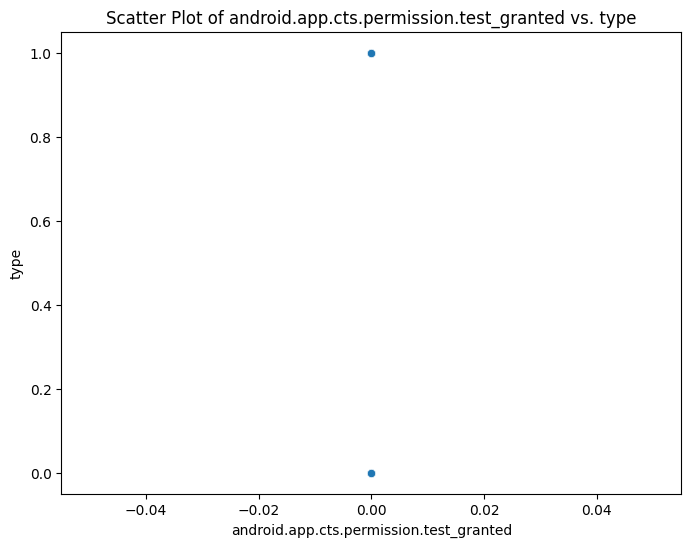

In [48]:
column1 = 'android.app.cts.permission.test_granted'
column2 = 'type'

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=column1, y=column2)
plt.title(f'Scatter Plot of {column1} vs. {column2}')
plt.xlabel(column1)
plt.ylabel(column2)

# Show the plot
plt.show()

Visualize correlations between numerical variables

In [33]:
df.corr()

,android,android.app.cts.permission.test_granted,android.intent.category.master_clear.permission.c2d_message,android.os.cts.permission.test_granted,android.permission.access_all_downloads,android.permission.access_all_external_storage,android.permission.access_bluetooth_share,android.permission.access_cache_filesystem,android.permission.access_checkin_properties,android.permission.access_coarse_location,...,com.android.voicemail.permission.write_voicemail,com.foo.mypermission,com.foo.mypermission2,org.chromium.chrome.shell.permission.c2d_message,org.chromium.chrome.shell.permission.debug,org.chromium.chrome.shell.permission.sandbox,org.chromium.chromecast.shell.permission.sandbox,org.chromium.content_shell.permission.sandbox,test_permission,type
android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
android.app.cts.permission.test_granted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
android.intent.category.master_clear.permission.c2d_message,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
android.os.cts.permission.test_granted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
android.permission.access_all_downloads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
org.chromium.chrome.shell.permission.sandbox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
org.chromium.chromecast.shell.permission.sandbox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
org.chromium.content_shell.permission.sandbox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test_permission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(331.5, -0.5)

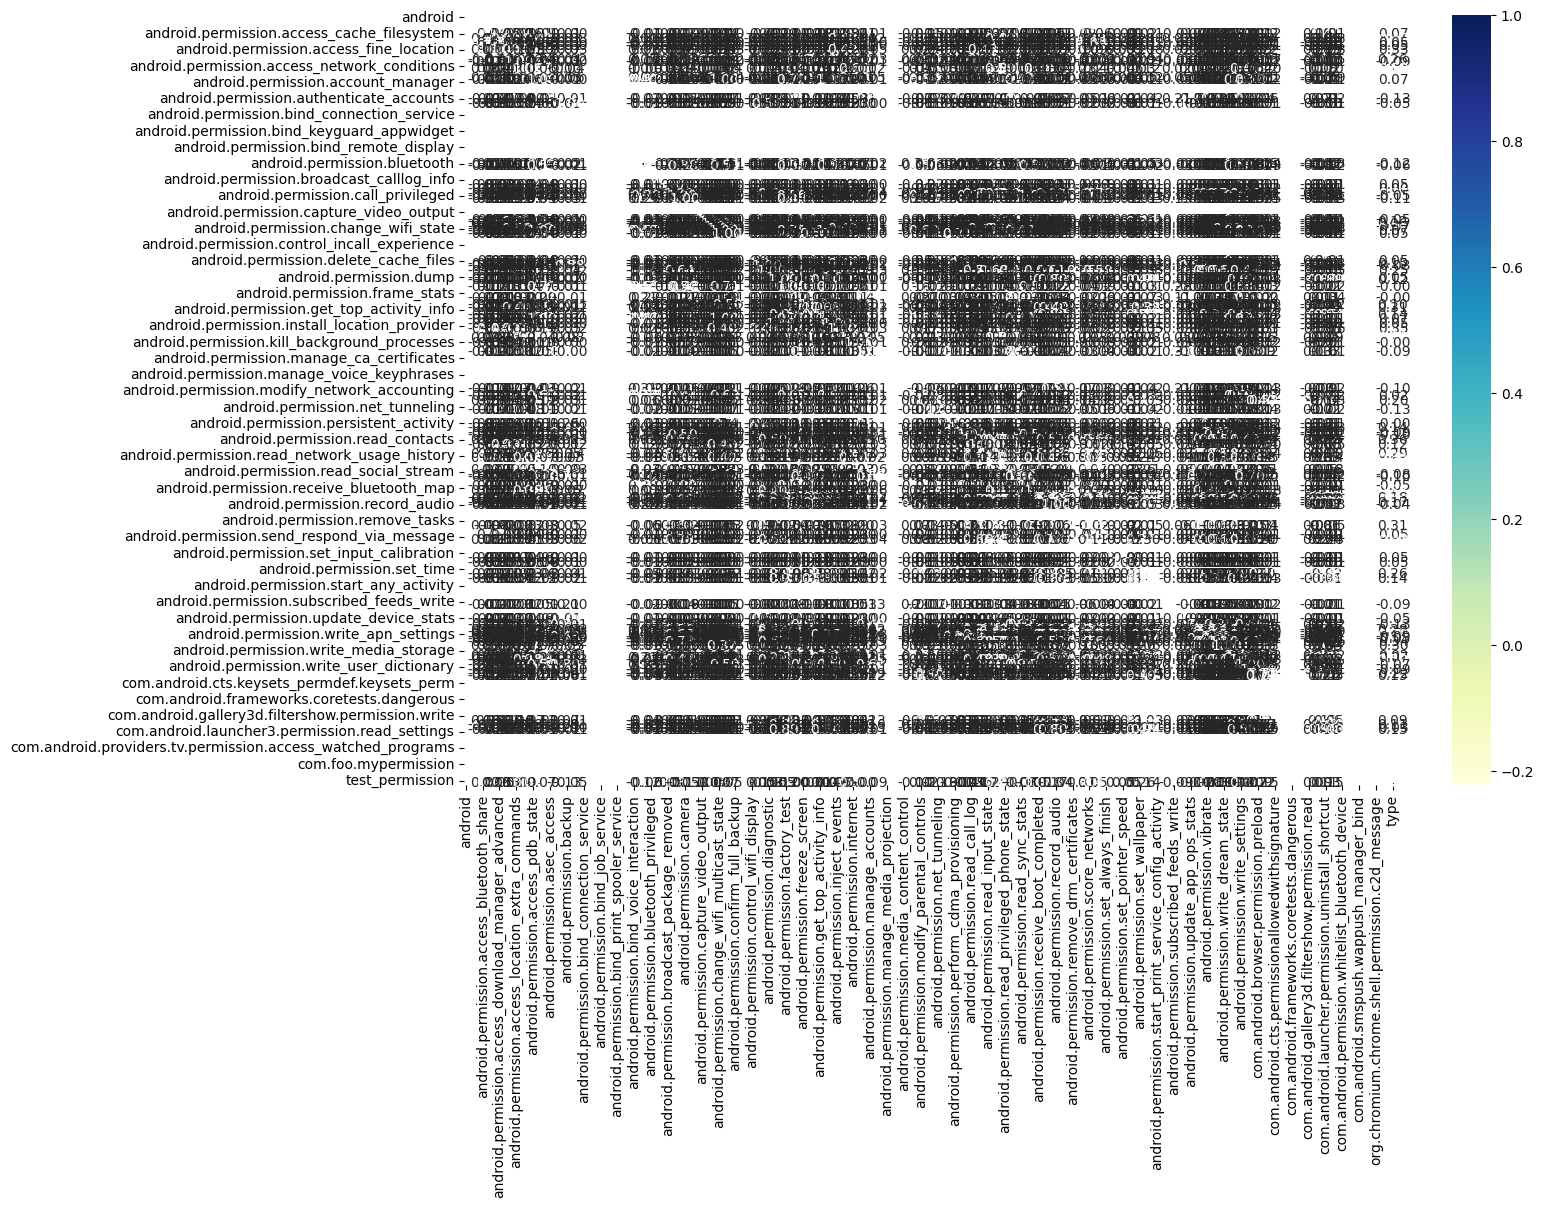

In [50]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top-0.5)

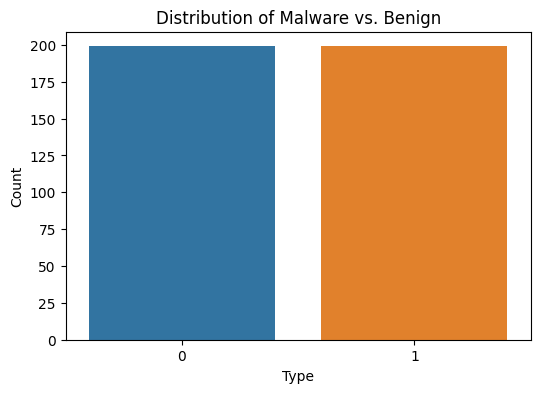

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type')
plt.title('Distribution of Malware vs. Benign')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'android.permission.access_network_state'),
  Text(1, 0, 'android.permission.access_wifi_state'),
  Text(2, 0, 'android.permission.access_coarse_location'),
  Text(3, 0, 'android.permission.access_fine_location'),
  Text(4, 0, 'android.permission.access_location_extra_commands'),
  Text(5, 0, 'android.permission.authenticate_accounts'),
  Text(6, 0, 'android.permission.access_mock_location'),
  Text(7, 0, 'android.permission.access_cache_filesystem'),
  Text(8, 0, 'android.permission.access_wimax_state'),
  Text(9, 0, 'android.permission.access_download_manager'),
  Text(10, 0, 'android.permission.access_download_manager_advanced'),
  Text(11, 0, 'android.permission.battery_stats'),
  Text(12, 0, 'android.permission.asec_rename'),
  Text(13, 0, 'android.p

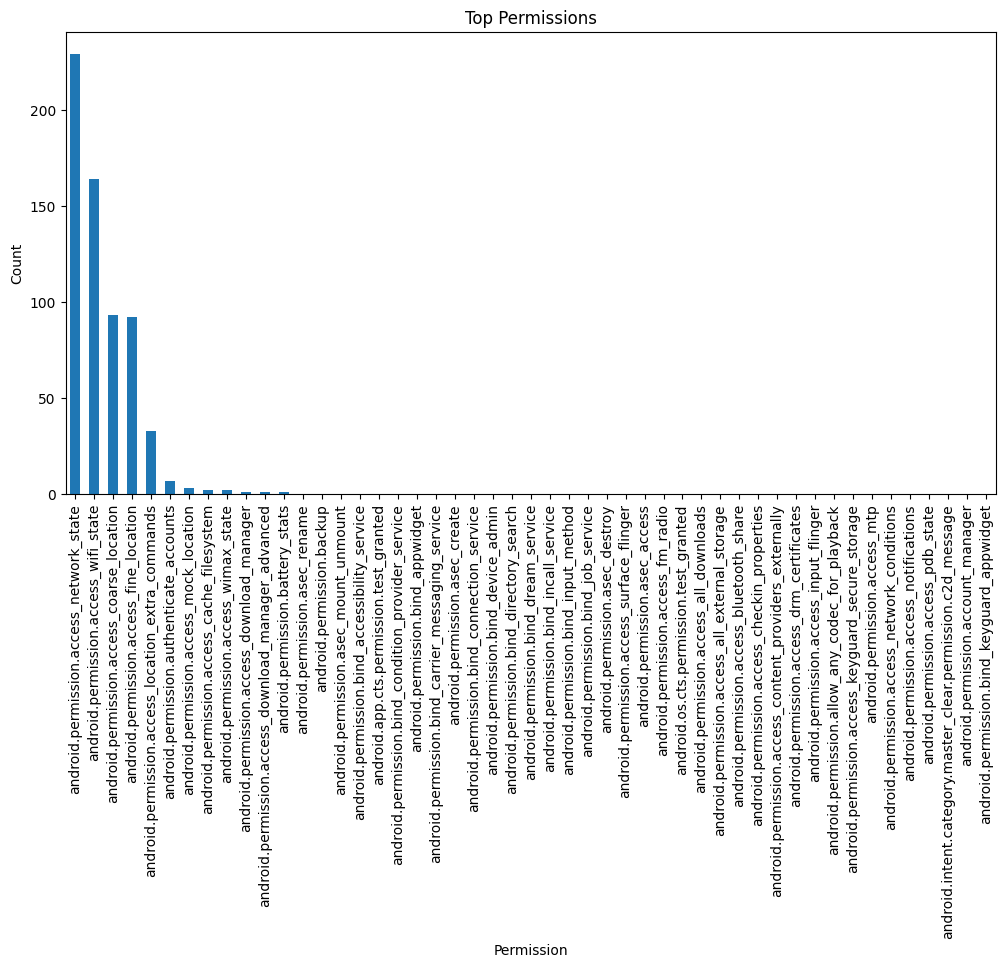

In [49]:
permission_columns = df.columns[1:50]  # Assuming permissions start from the second column
plt.figure(figsize=(12, 6))
df[permission_columns].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Top Permissions')
plt.xlabel('Permission')
plt.ylabel('Count')
plt.xticks(rotation=90)

## Data Wrangling and Preprocessing

Data pre-processing is a crucial step in preparing your dataset for machine learning. It involves cleaning, transforming, and organizing your data so that it can be effectively used to train machine learning models.

Get all non numeric values from the dataset

In [54]:
null_series = df.isnull().sum()
count =0
for _, val in null_series.items():
    if(val>0):
        print (_ + "      "+ str(val))
    else:
        count = count +1
print("number of columns with no null values: "+ str(count))

na_series = df.isna().sum()
count =0
for _, val in na_series.items():
    if(val>0):
        print (_ + "      "+ str(val))
    else:
        count = count +1
print("number of columns with no na values: "+ str(count))

number of columns with no null values: 331
number of columns with no na values: 331


So there are no missing values in the dataset

Find all outlier values in each column

In [56]:
onezero = 0
for column in df.columns:
    cnt = len(df[(df[column]!= 0) & (df[column]!= 1)])
    if(cnt > 0):
        print(column + " has "+ str(cnt) +" rows with value other than 0,1")
    else:
        onezero = onezero + 1
print("Total number of features with values as only 0,1: " + str(onezero))

Total number of features with values as only 0,1: 331


There are no outliers in any column

Since all values are either 0 or 1 no need to perform normalization

So let's cast the dataframe columns to integer type to ease out our analysis process

In [57]:
df = df.astype("int64")

In [47]:
df1= df.copy()
df1 = df1.loc[:,df1.columns.str.contains('type')  |  df1.columns.str.contains('write') | df1.columns.str.contains('delete') | df1.columns.str.contains('clear') | df1.columns.str.contains('boot') | df1.columns.str.contains('change')| df1.columns.str.contains('credential')|df1.columns.str.contains('admin')|df1.columns.str.contains('list')|df1.columns.str.contains('secure_storage')|df1.columns.str.contains('notifications')|df1.columns.str.contains('account')|df1.columns.str.contains('destroy')|df1.columns.str.contains('mount')|df1.columns.str.contains('authenticate')|df1.columns.str.contains('privileged')|df1.columns.str.contains('brick')|df1.columns.str.contains('transmit')|df1.columns.str.contains('capture')|df1.columns.str.contains('disable')|df1.columns.str.contains('install')|df1.columns.str.contains('certificate')|df1.columns.str.contains('send')|df1.columns.str.contains('shutdown')|df1.columns.str.contains('start_any_activity')|df1.columns.str.contains('lock')|df1.columns.str.contains('sms')|df1.columns.str.contains('call')|df1.columns.str.contains('danger')|df1.columns.str.contains('voicemail')]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df1.iloc[:, 1:42], df1['type'], test_size=0.20, random_state=42)

Splitting the Dataset into Training, Validation, and Test Sets

In [51]:
X = df.drop('android', axis=1)
y = df['android']

In [52]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

 Feature Scaling (Standardization)

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Now, we can use the pre-processed datasets (X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test)
for machine learning model training and evaluation.

#### Analyze feautres 

Count of malware (1) vs benign apps (0) based on type column

In [60]:
df.type.value_counts()

type
1    199
0    199
Name: count, dtype: int64

Top 10 features that determine whether the app is malware or not

To determine Malware Apps

In [61]:
pd.Series.sort_values(df[df.type==1].sum(axis=0), ascending=False)[1:11]

android.permission.internet                  195
android.permission.read_phone_state          190
android.permission.access_network_state      167
android.permission.write_external_storage    136
android.permission.access_wifi_state         135
android.permission.read_sms                  124
android.permission.write_sms                 104
android.permission.receive_boot_completed    102
android.permission.access_coarse_location     80
android.permission.change_wifi_state          75
dtype: int64

To determine Bengin Apps

In [62]:
pd.Series.sort_values(df[df.type==0].sum(axis=0), ascending=False)[1:11]

android.permission.write_external_storage    76
android.permission.access_network_state      62
android.permission.wake_lock                 36
android.permission.receive_boot_completed    30
android.permission.access_wifi_state         29
android.permission.read_phone_state          24
android.permission.vibrate                   21
android.permission.access_fine_location      18
android.permission.read_external_storage     15
android.permission.read_contacts             13
dtype: int64

#### PIE CHART

<Axes: ylabel='count'>

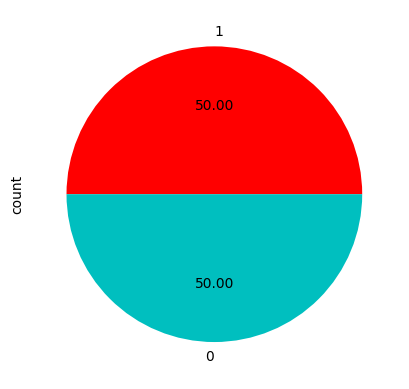

In [64]:
df["type"].value_counts().plot.pie(
    xlabel=['malicious','benign'],
    colors =['r','c'],
    autopct="%.2f",
)

#### BAR CHART

Top 10 features bar chart

<Axes: title={'center': 'Malware Apps'}, xlabel='Permissions', ylabel='Count of apps'>

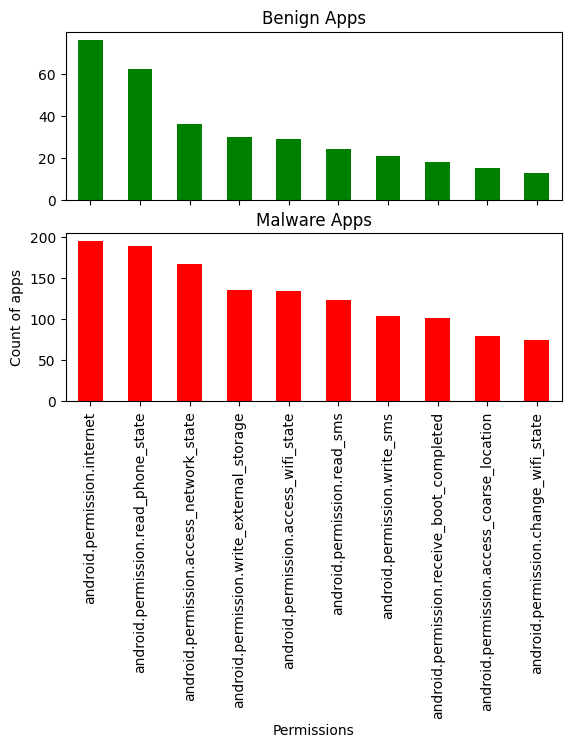

In [65]:
fig, axs =  plt.subplots(nrows=2, sharex=True)
pd.Series.sort_values(df[df.type==0].sum(axis=0), ascending=False)[1:11].plot.bar(ax=axs[0], color="green", title="Benign Apps")
pd.Series.sort_values(df[df.type==1].sum(axis=0), ascending=False)[1:11].plot.bar(ax=axs[1], color="red", title="Malware Apps", ylabel="Count of apps", xlabel="Permissions")

Describing the features in the dataset

In [145]:
df_desc = df.describe()
df_desc

,android,android.app.cts.permission.test_granted,android.intent.category.master_clear.permission.c2d_message,android.os.cts.permission.test_granted,android.permission.access_all_downloads,android.permission.access_all_external_storage,android.permission.access_bluetooth_share,android.permission.access_cache_filesystem,android.permission.access_checkin_properties,android.permission.access_coarse_location,...,org.chromium.chrome.shell.permission.sandbox,org.chromium.chromecast.shell.permission.sandbox,org.chromium.content_shell.permission.sandbox,test_permission,type,total_permissions,internet_permissions_ratio,has_highly_requested_permissions,total_permissions_scaled,internet_permissions_ratio_scaled
count,398.0,398.0,398.0,398.0,398.0,398.0,398.0,398.000000,398.0,398.000000,...,398.0,398.0,398.0,398.0,398.000000,398.000000,358.0,398.000000,3.980000e+02,358.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005025,0.0,0.233668,...,0.0,0.0,0.0,0.0,0.500000,7.753769,0.0,0.806533,7.141133e-17,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070799,0.0,0.423696,...,0.0,0.0,0.0,0.0,0.500629,6.466318,0.0,0.395513,1.001259e+00,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,-1.200610e+00,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,2.000000,0.0,1.000000,-8.909260e-01,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.500000,7.000000,0.0,1.000000,-1.167152e-01,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.000000,12.000000,0.0,1.000000,6.574956e-01,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000000,...,0.0,0.0,0.0,0.0,1.000000,31.000000,0.0,1.000000,3.599496e+00,0.0


In [146]:
df1= df.copy()
df1 = df1.loc[:,df1.columns.str.contains('type')  |  df1.columns.str.contains('write') | df1.columns.str.contains('delete') | df1.columns.str.contains('clear') | df1.columns.str.contains('boot') | df1.columns.str.contains('change')| df1.columns.str.contains('credential')|df1.columns.str.contains('admin')|df1.columns.str.contains('list')|df1.columns.str.contains('secure_storage')|df1.columns.str.contains('notifications')|df1.columns.str.contains('account')|df1.columns.str.contains('destroy')|df1.columns.str.contains('mount')|df1.columns.str.contains('authenticate')|df1.columns.str.contains('privileged')|df1.columns.str.contains('brick')|df1.columns.str.contains('transmit')|df1.columns.str.contains('capture')|df1.columns.str.contains('disable')|df1.columns.str.contains('install')|df1.columns.str.contains('certificate')|df1.columns.str.contains('send')|df1.columns.str.contains('shutdown')|df1.columns.str.contains('start_any_activity')|df1.columns.str.contains('lock')|df1.columns.str.contains('sms')|df1.columns.str.contains('call')|df1.columns.str.contains('danger')|df1.columns.str.contains('voicemail')]

In [147]:
df1.head()

,android.intent.category.master_clear.permission.c2d_message,android.permission.access_drm_certificates,android.permission.access_keyguard_secure_storage,android.permission.access_notifications,android.permission.account_manager,android.permission.asec_destroy,android.permission.asec_mount_unmount,android.permission.authenticate_accounts,android.permission.bind_device_admin,android.permission.bind_incall_service,...,com.android.launcher.permission.uninstall_shortcut,com.android.launcher.permission.write_settings,com.android.launcher3.permission.write_settings,com.android.permission.whitelist_bluetooth_device,com.android.providers.tv.permission.write_epg_data,com.android.smspush.wappush_manager_bind,com.android.voicemail.permission.add_voicemail,com.android.voicemail.permission.read_voicemail,com.android.voicemail.permission.write_voicemail,type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [148]:
df1 = df1.loc[:, (df1 != 0).any(axis=0)]
df1.describe()

,android.permission.authenticate_accounts,android.permission.bluetooth_admin,android.permission.call_phone,android.permission.call_privileged,android.permission.change_component_enabled_state,android.permission.change_configuration,android.permission.change_network_state,android.permission.change_wifi_multicast_state,android.permission.change_wifi_state,android.permission.change_wimax_state,...,android.permission.write_external_storage,android.permission.write_secure_settings,android.permission.write_settings,android.permission.write_sms,android.permission.write_sync_settings,com.android.browser.permission.write_history_bookmarks,com.android.launcher.permission.install_shortcut,com.android.launcher.permission.uninstall_shortcut,com.android.launcher.permission.write_settings,type
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,0.017588,0.017588,0.155779,0.002513,0.002513,0.015075,0.025126,0.005025,0.221106,0.005025,...,0.532663,0.012563,0.055276,0.263819,0.020101,0.045226,0.042714,0.007538,0.022613,0.500000
std,0.131614,0.131614,0.363102,0.050125,0.050125,0.122006,0.156704,0.070799,0.415514,0.070799,...,0.499560,0.111518,0.228807,0.441257,0.140521,0.208061,0.202465,0.086601,0.148854,0.500629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Engineering

1. Total Permissions: Sum of all permission columns

In [150]:
df['total_permissions'] = df.iloc[:, 1:-1].sum(axis=1)

2. Ratio of 'Internet Access' Permissions to Total Permissions

In [151]:
internet_permissions = ['android.permission.internet','org.chromium.chrome.shell.permission.c2d_message',
       'org.chromium.chrome.shell.permission.debug',
       'org.chromium.chrome.shell.permission.sandbox',
       'org.chromium.chromecast.shell.permission.sandbox',
       'org.chromium.content_shell.permission.sandbox']  # Replace with actual column names
df['internet_permissions_ratio'] = df[internet_permissions].sum(axis=1) / df['total_permissions']

3. Presence of Highly Requested Permissions

In [152]:
highly_requested_permissions = ['android.permission.read_phone_state','android.permission.access_network_state','android.permission.write_external_storage','android.permission.access_wifi_state','android.permission.access_fine_location','android.permission.read_external_storage','android.permission.read_contacts']  # Replace with actual column names
df['has_highly_requested_permissions'] = df[highly_requested_permissions].any(axis=1).astype(int)

4. Feature Scaling

In [153]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['total_permissions', 'internet_permissions_ratio']])

Add the scaled features back to the dataframe

In [154]:
df[['total_permissions_scaled', 'internet_permissions_ratio_scaled']] = scaled_features

Now, your dataframe (df) contains the original data along with the engineered features.

#### Plot grouped bar chart to better understand the feature relationship

<Axes: >

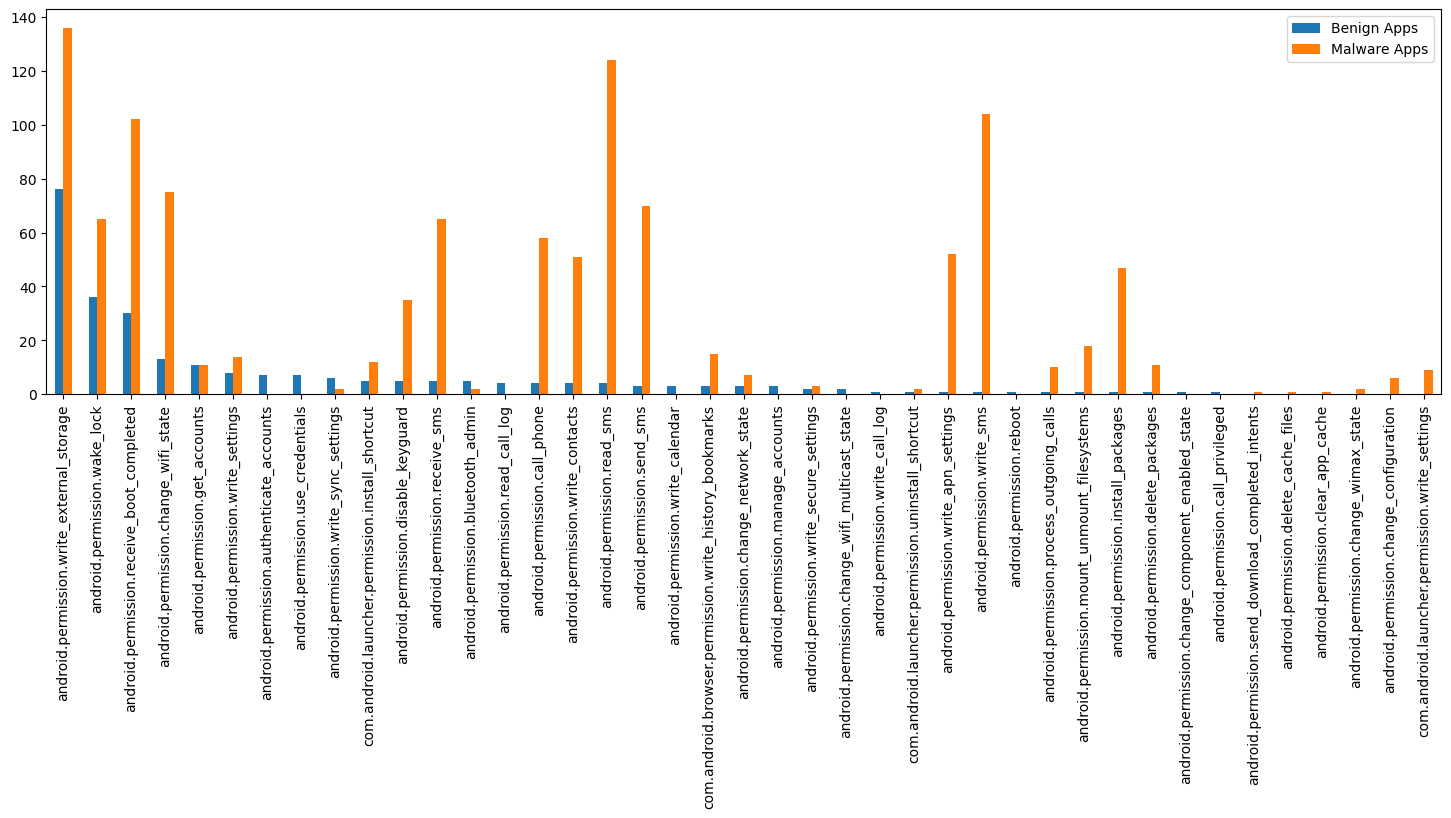

In [155]:
bdf1 = pd.Series.sort_values(df1[df1.type==0].sum(axis=0), ascending=False)
mdf1 = pd.Series.sort_values(df1[df1.type==1].sum(axis=0), ascending=False)
del bdf1['type']
del mdf1['type']
pd.concat({'Benign Apps': bdf1, 'Malware Apps': mdf1}, axis=1).plot.bar(figsize=(18,5))

#### Feature selection

Top 10 features that determine malware

<Axes: title={'center': 'Malware Apps'}, xlabel='Permissions', ylabel='Count of apps'>

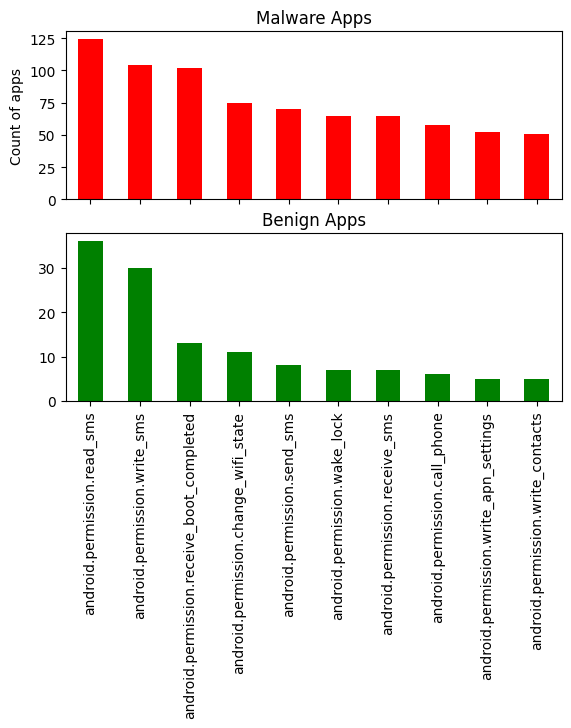

In [156]:
fig, axs =  plt.subplots(nrows=2, sharex=True)
bdf1[1:11].plot.bar(ax=axs[1], color="green", title="Benign Apps")
mdf1[1:11].plot.bar(ax=axs[0], color="red", title="Malware Apps", ylabel="Count of apps", xlabel="Permissions")

## Data Splitting

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
print("Training set - Features:", X_train.shape, "Labels:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Labels:", y_test.shape)

Training set - Features: (318, 330) Labels: (318,)
Testing set - Features: (80, 330) Labels: (80,)


## Modelling

In [159]:
X_train, X_test, y_train, y_test = train_test_split(df1.iloc[:, 1:42], df1['type'], test_size=0.20, random_state=42)

In [160]:
X_train.shape, X_test.shape

((318, 41), (80, 41))

In [161]:
y_train.shape, y_test.shape

((318,), (80,))

#### Naive Bayes algorithm

In [162]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
accuracy = accuracy_score(pred, y_test)
print("Naive Bayes")
print("Accuracy: " + str(accuracy))
print(classification_report(pred, y_test, labels=None))

Naive Bayes
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        46

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



#### k-neighbors algorithm

In [163]:
for i in range(3,15,3):
    
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    pred = neigh.predict(X_test)
    accuracy = accuracy_score(pred, y_test)
    print("k-neighbors {}".format(i))
    print("Accuracy: " + str(accuracy))
    print(classification_report(pred, y_test, labels=None))
    print("")

k-neighbors 3
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        46

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


k-neighbors 6
Accuracy: 0.925
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.87      1.00      0.93        40

    accuracy                           0.93        80
   macro avg       0.93      0.93      0.92        80
weighted avg       0.93      0.93      0.92        80


k-neighbors 9
Accuracy: 0.9125
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        41
           1       0.85      1.00      0.92        39

    accuracy                           0.91        80
   macro avg       0.92      0.91    

#### Decision Tree

In [164]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [165]:
y_pred_gini = clf_gini.predict(X_test)

Check accuracy score with criterion gini index

In [166]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 1.0000


Here, y_test are the true class labels and y_pred_gini are the predicted class labels in the test-set.

Compare the train-set and test-set accuracy to check for overfitting

In [167]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,

In [168]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 1.0000


Check for overfitting and underfitting

In [169]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))


Training set score: 1.0000
Test set score: 1.0000


Here, the training-set accuracy score is 1.0000 while the test-set accuracy to be 1.0000. These two values are quite comparable. So, there is no sign of overfitting.

#### Visualize decision-trees

[Text(0.5, 0.75, 'x[40] <= 0.5\ngini = 0.499\nsamples = 318\nvalue = [165, 153]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 165\nvalue = [165, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 153\nvalue = [0, 153]')]

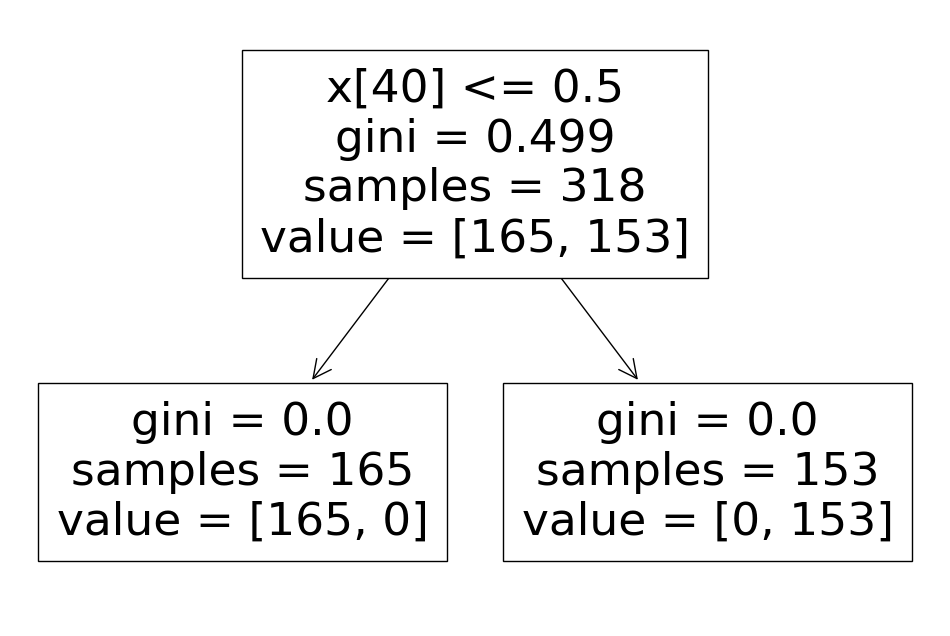

In [170]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train))

Decision Tree Classifier with criterion entropy

In [171]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

Predict the Test set results with criterion entropy

In [172]:
y_pred_en = clf_en.predict(X_test)

Check accuracy score with criterion entropy

In [173]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 1.0000


Compare the train-set and test-set accuracy

In [174]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,

In [175]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 1.0000


Check for overfitting and underfitting

In [176]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 1.0000 while the test-set accuracy to be 1.0000. These two values are quite comparable. So, there is no sign of overfitting

#### Visualize decision-tree

[Text(0.5, 0.75, 'x[40] <= 0.5\nentropy = 0.999\nsamples = 318\nvalue = [165, 153]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 165\nvalue = [165, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 153\nvalue = [0, 153]')]

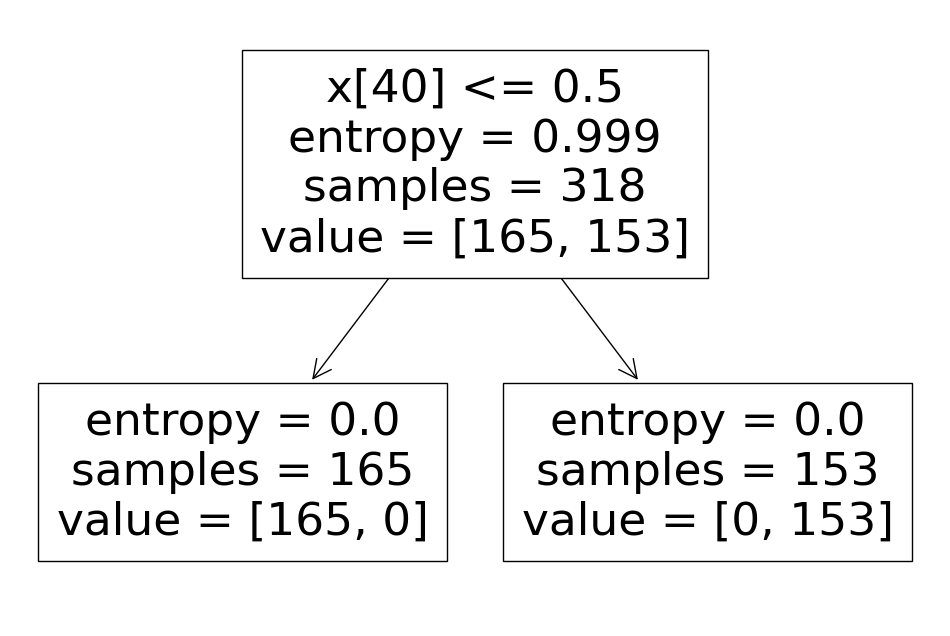

In [177]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_en.fit(X_train, y_train)) 

Now, based on the above analysis we can conclude that our classification model accuracy is excellent. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

We have another tool called Confusion matrix that comes to our rescue.

#### Confusion matrix

In [178]:
cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[34  0]
 [ 0 46]]


## Classification Report

In [179]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        46

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [180]:
rdF=RandomForestClassifier(n_estimators=250, max_depth=50,random_state=45)
rdF.fit(X_train,y_train)
pred=rdF.predict(X_test)
cm=confusion_matrix(y_test, pred)

accuracy = accuracy_score(y_test,pred)
print("Random Forest Classifier")
print("Accuracy Score: "+ str(accuracy))
print(classification_report(y_test,pred, labels=None))
print("cohen kappa score: ", cohen_kappa_score(y_test, pred))
print("")
print('Confusion matrix\n\n',cm)

Random Forest Classifier
Accuracy Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        46

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

cohen kappa score:  1.0

Confusion matrix

 [[34  0]
 [ 0 46]]


## RESULT

We tried Naive Bayes which resulted in accuracy score of 1.0

Then we tried K-neighbout which resulted in accuracy score as follows,
kneighbors: 3 Accuracy: 1.0
kneighbors: 6 Accuracy: 0.9125
kneighbors: 9 Accuracy: 0.9125
kneighbors: 12 Accuracy: 0.9

So we have built a Decision-Tree Classifier model for Android Malware Detection.

We built two models, one with criterion gini index and another one with criterion entropy.

These models yields a very good performance as indicated by the model accuracy in both the cases to be 1.0000.

In the model with criterion gini index, the training-set accuracy score and the test-set accuracy to be 1.0000.

These two values are same. 

So, there is no sign of overfitting.

Similarly, in the model with criterion entropy, the training-set accuracy score and the test-set accuracy to be 1.0000. 

These two values are same. So, there is no sign of overfitting.

Then we tried Random forest classifier which resulted in accuracy score of 1.0 and cohen kappa score of 1.0.

The confusion matrix and classification report yields excellent model performance.